# Fourier transforms
© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

The methods shown in this notebook specifically refer to the [Fast Fourier Transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform), which is a specific algorithm to apply the [Discrete Fourier Transform (DFT)](https://en.wikipedia.org/wiki/Discrete_Fourier_transform).

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/soil_dynamics/blob/main/notebooks/fourier_transforms.ipynb).


## Required modules and global setup for plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.fft import fft, fftfreq
from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    from google.colab import output
    output.enable_custom_widget_manager()
    %pip install ipympl &> ~/pip-log.txt

%matplotlib widget

plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
html_setup = '<style> div.jupyter-widgets.widget-label {display: none;} </style>'

## General concept

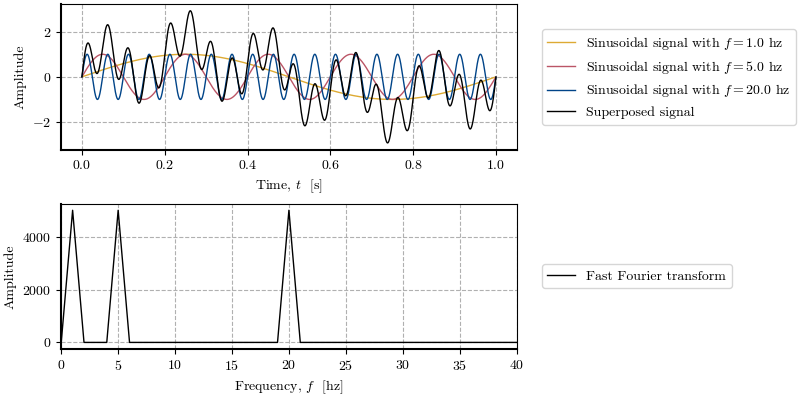

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [2]:
def simulate_fft(
        freq_1=1, freq_2=5, freq_3=20, duration=1, delta_t=0.0001, widget=False):
    # Time interval
    sampling_freq = 1 / delta_t
    time = np.arange(0, duration, delta_t)

    # Create two sine waves
    amplitude_1 = np.sin(2 * np.pi * freq_1 * time)
    amplitude_2 = np.sin(2 * np.pi * freq_2 * time)
    amplitude_3 = np.sin(2 * np.pi * freq_3 * time)
    superposed_signal = amplitude_1 + amplitude_2 + amplitude_3

    # Fast Fourier transform (FFT)
    n_t = int(duration / delta_t)  # Number of samples in time
    x_fft = fftfreq(n_t, delta_t)
    x_fft = x_fft[range(n_t // 2)]
    y_fft = abs(fft(superposed_signal))
    y_fft = y_fft[range(n_t // 2)]

    # Figures
    fig, axs = plt.subplots(num=None, ncols=1, nrows=2, figsize=[8, 4])
    # Time domain
    axs[0].plot(time, amplitude_1, lw=1, color="#DDAA33",
                label=f'Sinusoidal signal with $f={freq_1:.1f}$ hz')
    axs[0].plot(time, amplitude_2, lw=1, color="#BB5566",
                label=f'Sinusoidal signal with $f={freq_2:.1f}$ hz')
    axs[0].plot(time, amplitude_3, lw=1, color="#004488",
                label=f'Sinusoidal signal with $f={freq_3:.1f}$ hz')
    axs[0].plot(time, superposed_signal, lw=1, color="k", label='Superposed signal')
    axs[0].set_xlabel('Time, $t$  [s]')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend(bbox_to_anchor=(1.04,0.5), loc="center left")
    # Frequency domain
    axs[1].plot(x_fft, y_fft, lw=1, color="k", label='Fast Fourier transform')
    axs[1].set_xlabel('Frequency, $f$  [hz]')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend(bbox_to_anchor=(1.04,0.5), loc="center left")
    axs[1].set_xlim((0, 2 * max([freq_1, freq_2, freq_3])))
    # Plot details
    for ax in axs.flat:
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.grid(True, which="major", linestyle="--")
    # fig.tight_layout()
    if widget:
        display(fig)
    else:
        plt.show()
        display(wgt.HTML(html_setup))
    plt.close()
    return


simulate_fft(freq_1=1, freq_2=5, freq_3=20, duration=1)

In [3]:
s, l = {'description_width': '50px'}, wgt.Layout(width='400px')
controls = {
    'freq_1': wgt.FloatSlider(value=1, min=0, max=100, step=0.5, description='f_1 [hz]', style=s, layout=l),
    'freq_2': wgt.FloatSlider(value=5, min=0, max=100, step=0.5, description='f_2 [hz]', style=s, layout=l),
    'freq_3': wgt.FloatSlider(value=20, min=0, max=100, step=0.5, description='f_3 [hz]', style=s, layout=l),
    # 'delta_t': wgt.FloatSlider(value=0.001, min=0.0001, max=0.01, step=0.0005, description='Δt [s]', readout_format='.3f', style=s, layout=l),
    'duration': wgt.FloatSlider(value=1, min=0, max=10, step=0.5, description='tₘₐₓ [s]', style=s, layout=l),
    'widget': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', disabled=False, style=s, layout=l)
}
fig = wgt.interactive_output(simulate_fft, controls)
wgt.HBox((wgt.VBox(list(controls.values())), fig), layout=wgt.Layout(align_items='center'))

## Earthquake signal

### Reading data

In [4]:
domain = "https://raw.githubusercontent.com/eamontoyaa/data4testing/main/pynewmarkdisp/"
file = "earthquake_data_real.csv"
g = 98.1  # cm/s^2
data = pd.read_csv(f"{domain}{file}", sep=";")
time = np.array(data['Time'])
accel = np.array(data['Acceleration']) / g

### Applying the FFT

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

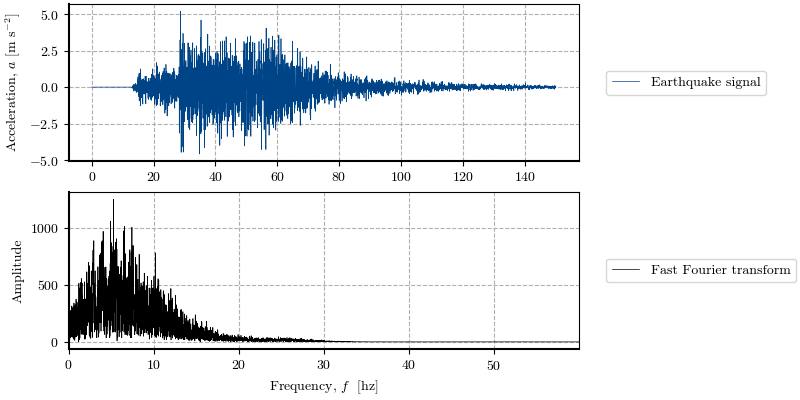

In [5]:
# Fast Fourier transform (FFT)
delta_t = time[1]
duration = time[-1]
n_t = int(duration / delta_t)  # Number of samples in time
x_fft = fftfreq(n_t, delta_t)
x_fft = x_fft[range(n_t // 2)]
y_fft = abs(fft(accel))
y_fft = y_fft[range(n_t // 2)]

# Figures
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=[8, 4])
# Time domain
axs[0].plot(time, accel, lw=0.5, color="#004488", label='Earthquake signal')
axs[0].set(ylabel="Acceleration, $a$ [m s$^{- 2}$]")
axs[0].legend(bbox_to_anchor=(1.04,0.5), loc="center left")
# Frequency domain
axs[1].plot(x_fft, y_fft, lw=0.5, color="k", label='Fast Fourier transform')
axs[1].set_xlabel('Frequency, $f$  [hz]')
axs[1].set_ylabel('Amplitude')
axs[1].legend(bbox_to_anchor=(1.04,0.5), loc="center left")
axs[1].set_xlim((0, 0.6 * x_fft[-1]))
# Plot details
for ax in axs.flat:
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.grid(True, which="major", linestyle="--")
display(wgt.HTML(html_setup))
plt.show()
plt.close()